In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.linalg as la

## Importing Population Data from Andrew's work

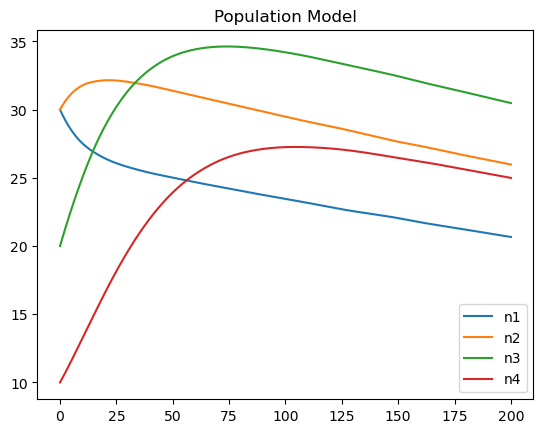

In [37]:
%store -r sol 

N_matrix = sol.y
domain = sol.t
for i in range(4):
    plt.plot(sol.t, N_matrix[i,:], label="n"+str(i+1))
plt.title("Population Model")
plt.legend()
plt.show()

In [38]:
# Define constants

# Model for the U.S
alpha = 0.4                            # For developed countries
A = 1                                  # Assume constant technology
delta = 0.037                          # Depreciation rate of capital.
domain = sol.t # Subject to change
k0 = [1]
t_span = (0,domain[-1])
lfgr = 0.01
s = 0.4

def n(t):
    if t not in domain: # If the input is not found in the domain, map it to the nearest domain value
        t1 = np.argmin(la.norm(domain-t))
    else:
        t1 = t
    index = np.where(domain == t1)[0]
    return N_matrix[:,index[0]]
n = np.vectorize(n)

## Generational Productivity


This variation of our model factors for different levels of productivity depending on the age category. Our age groups are divided into 0-18, 18-40, 40-65, and 65-85. Each age group has a different level of productivity in the economy and is assigned a different multiplier. 

Generational productivity is reflected in the production function of the Solow Growth Model. The traditional model defines the production function as:

$y(t) = A(t)k(t)^{\alpha}$

We will account for generational productivity by introducing a vector $p \in \mathbb{R}^4$. This vector contains the multipliers for each age group. The model is adjusted by taking the standard inner product of p and n, normalizing this term with respect to n, and multiplying this term to our production function, as follows.

$$y(t) = A(t)k(t)^{\alpha} \frac{p\cdot n}{\lVert n \rVert _{1}} $$

In [43]:
def Solow_productivity(t,k, p = np.array([1,1,1,1])):
    """Models the Solow growth curve, but with the variation that productivity depends on population class
    Parameters:
    t (float) - The time element
    k (callable function) - Capital. This is the dependent variable
    """
    y = A * (k**alpha) * np.dot(p,n(t)) / (np.sum(n(t)))
    return s*y - (delta + lfgr)*k

Choosing the correct multipliers for each age group is important to creating an accurate model. The multipliers only matter relative to one another. As such, we will consider the age group 41-65 as "unit productive". All other multipliers will be in relation to this multiplier. For a standard productivity model, we chose the following multipliers.

$$ p = [0.1, 0.8, 1.0, 0.3] $$

Individuals in the range of 0-18 years often do not work and even if they do, their labor is generally not as productive as it would be later in life due to lack of education. Therefore, we assigned this group a multiplier of 0.1

The 19-40 age group represents a majority of the work force, but also includes college-age students, which will result in a slight decrease in productivity. As a result, this group was assigned a multiplier of 0.8.

The 41-65 age group represents the older bracket of workers. This age group was considered the most productive because these individuals are generally finished with their education and can devote all their time to working, and benefit from having more experience than the previous two age groups.

Most members of the 66-85 age group are retired or are relatively unproductive workers. This group was given a multiplier of 0.3.

The standard model can be fit into this framework by averaging the multipliers and creating a constant $\overline p$ vector. In this case, $\overline p = [0.55, 0.55, 0.55, 0.55]$

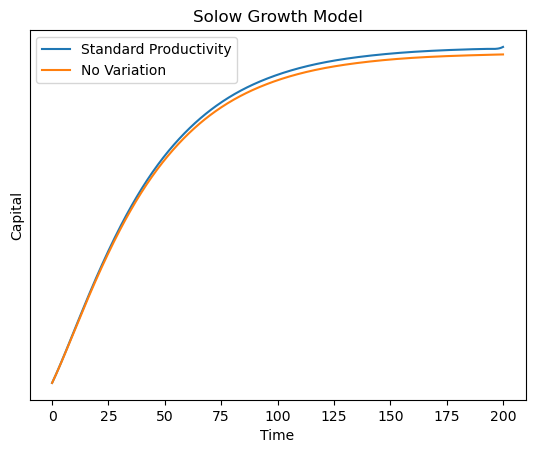

In [57]:
p_list = [np.array([0.1, 0.8, 1.0, 0.3]), np.array([0.55, 0.55, 0.55, 0.55])]
label_list = ["Standard Productivity", "No Variation"]

for p, label in zip(p_list, label_list):
    k = solve_ivp(Solow_productivity, t_span, k0, t_eval=domain, args=[p,])
    plt.plot(k.t, k.y[0], label=label)

plt.title("Solow Growth Model")
plt.xlabel("Time")
plt.ylabel("Capital")
plt.yticks([])
plt.legend()
plt.show()

## Retirement Age Shift

TODO: Add this section

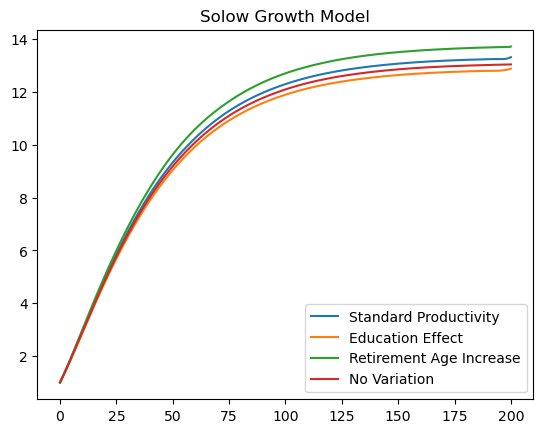

In [52]:
p_list = [np.array([0.1, 0.8, 1.0, 0.3]), np.array([0.1, 0.8, 1.0, .2]), np.array([0.1, 0.8, 1.0, 0.4]), np.array([0.55, 0.55, 0.55, 0.55])]
label_list = ["Standard Productivity", "Education Effect", "Retirement Age Increase", "No Variation"]

for p, label in zip(p_list, label_list):
    k = solve_ivp(Solow_productivity, t_span, k0, t_eval=domain, args=[p,])
    plt.plot(k.t, k.y[0], label=label)


plt.title("Solow Growth Model")
plt.legend()
plt.show()

## Generational Saving Habits

In [ ]:
# TODO: This part

def Solow_savings(t,k, c = np.array([1,1,1,1])):
    """Models the Solow growth curve, but with the variation that productivity depends on population class
    Parameters:
    t (float) - The time element
    k (callable function) - Capital. This is the dependent variable
    """
    y = A * (k**alpha) * np.dot(c,n)
    
    return s*y - (delta + lfgr)*k

### Experimenting

In [8]:
%store -r
testString

'This string will hopefully make it to the other notebook'